## Contents
- [Read dataset](#Read-miles-per-gallon-dataset)
- [Set chart (figure) size](#Set-chart-(figure)-size)
- [Count discrete variable](#Count-discrete-variable)
- [countplot order by value counts](#countplot-order-by-value_counts)
- [Add horizontal line](#Add-horizontal-line)
- [Add vertical line](#Add-vertical-line)
- [Categorize 'drv' column](#Categorize-'drv'-column)
- [Create 'gear' column from trans](#Create-'gear'-column-from-trans)

## Seaborn (countplot) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.1.3
seaborn version: 0.11.0


### Read miles per gallon dataset 

In [3]:
url = 'https://github.com/prasertcbs/tutorial/raw/master/mpg.csv'
df = pd.read_csv(url)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:xlabel='manufacturer', ylabel='count'>

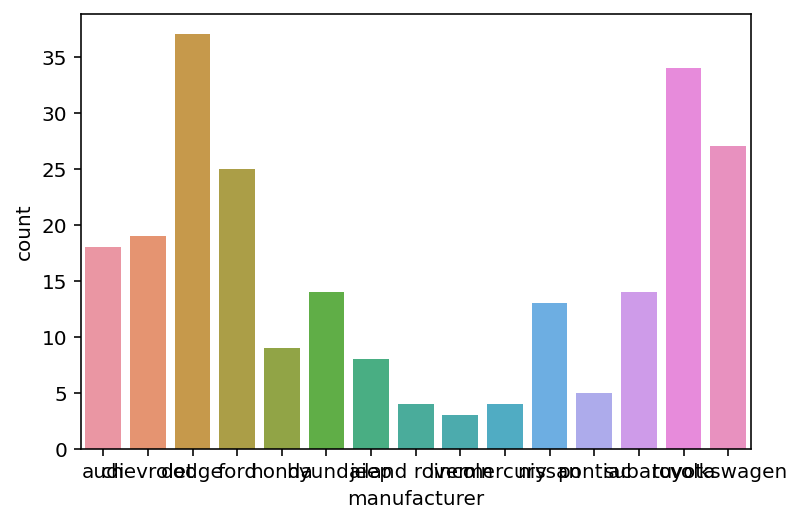

In [4]:
sns.countplot(x='manufacturer', data=df)

<AxesSubplot:xlabel='count', ylabel='manufacturer'>

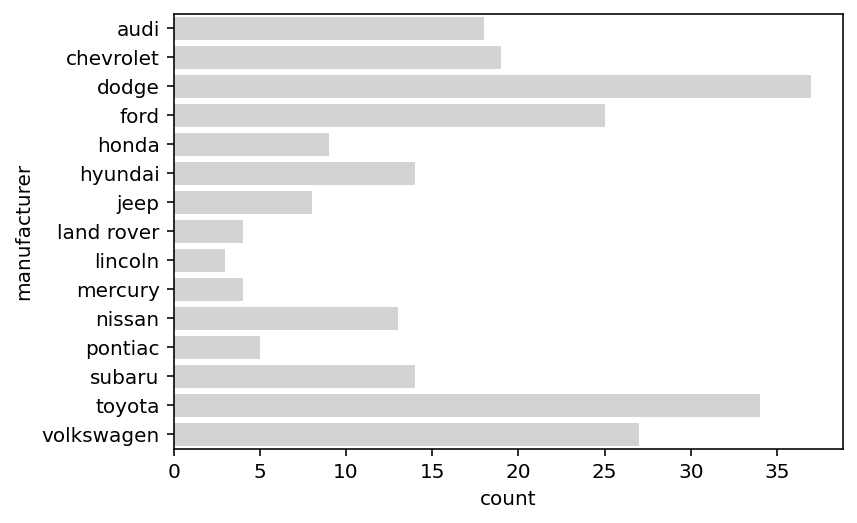

In [5]:
sns.countplot(y='manufacturer', data=df, color='lightgray')

<AxesSubplot:xlabel='class', ylabel='count'>

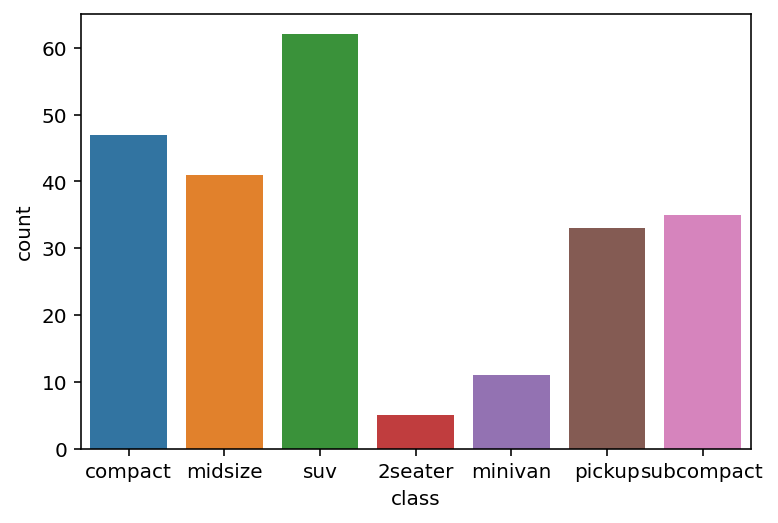

In [6]:
sns.countplot(x='class', data=df)

### Set chart (figure) size 

<AxesSubplot:xlabel='class', ylabel='count'>

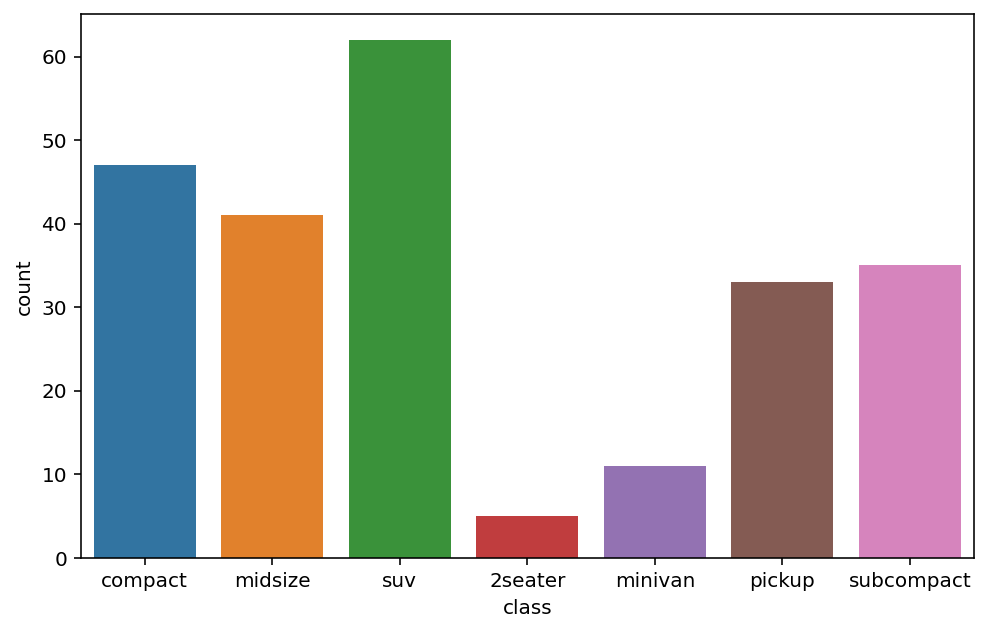

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=df)

### Count discrete variable 

<AxesSubplot:xlabel='cyl', ylabel='count'>

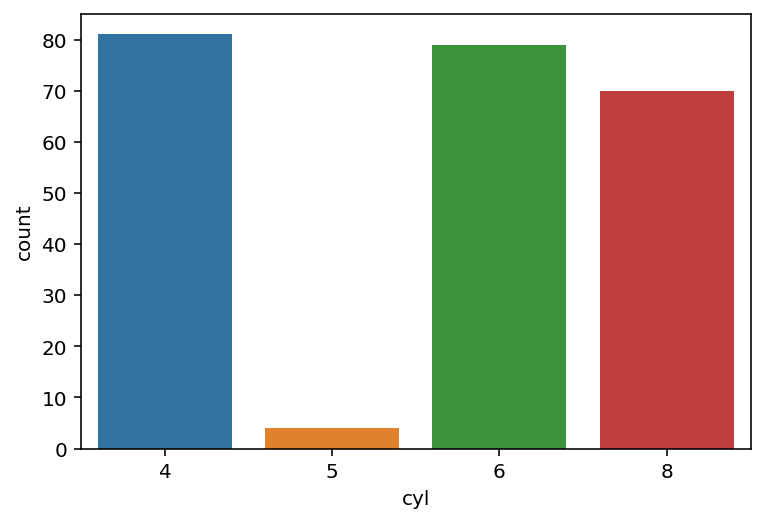

In [8]:
sns.countplot(x='cyl', data=df)

<AxesSubplot:xlabel='year', ylabel='count'>

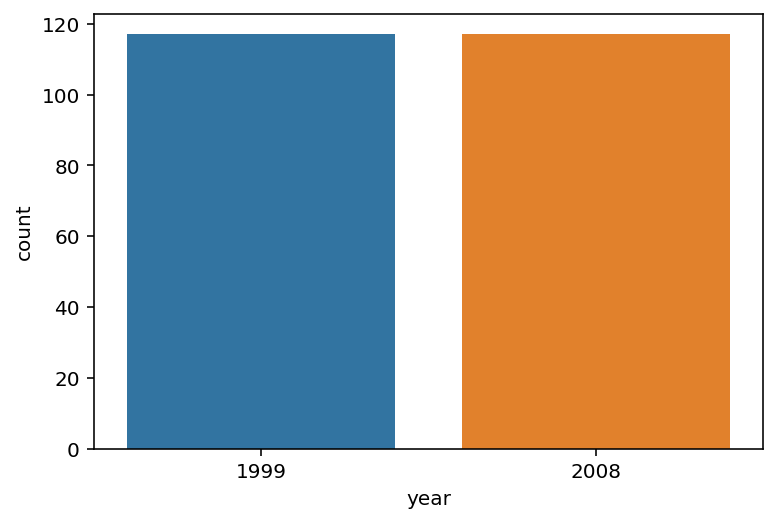

In [9]:
sns.countplot(x='year', data=df)

<AxesSubplot:xlabel='cty', ylabel='count'>

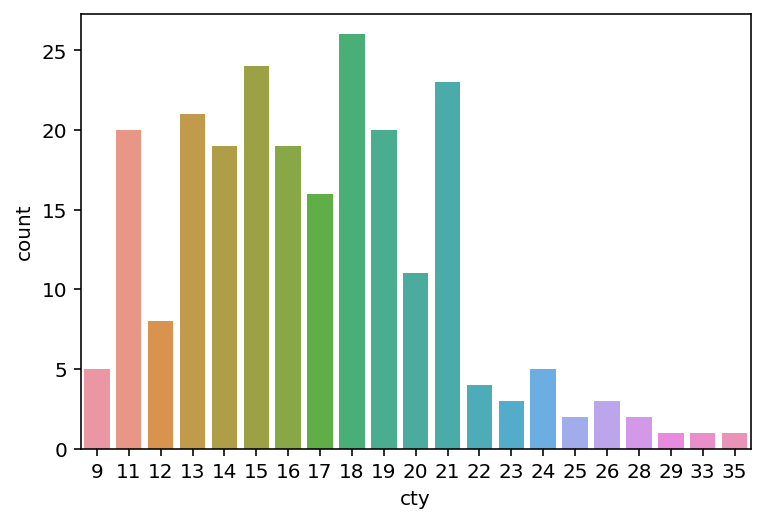

In [10]:
sns.countplot(x='cty', data=df) # ไม่เหมาะกับข้อมูลที่เป็น interval

### countplot order by value_counts 

In [11]:
df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [12]:
df['class'].value_counts().index

Index(['suv', 'compact', 'midsize', 'subcompact', 'pickup', 'minivan',
       '2seater'],
      dtype='object')

<AxesSubplot:xlabel='class', ylabel='count'>

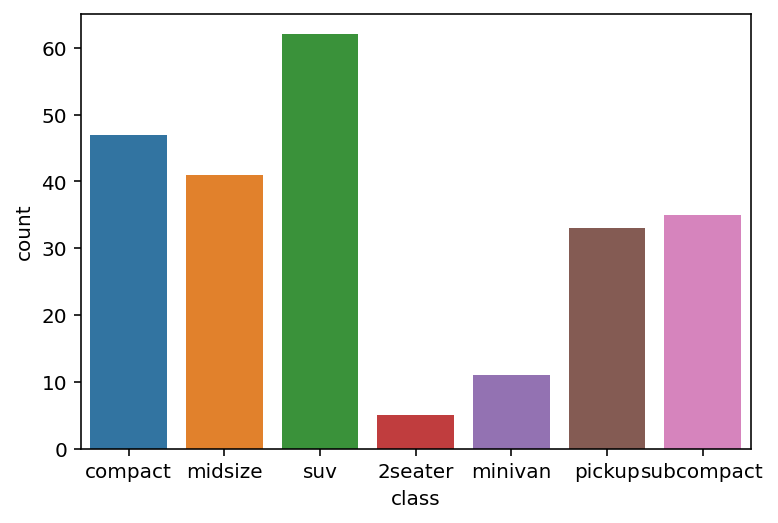

In [13]:
sns.countplot(x = 'class', data = df)

<AxesSubplot:xlabel='class', ylabel='count'>

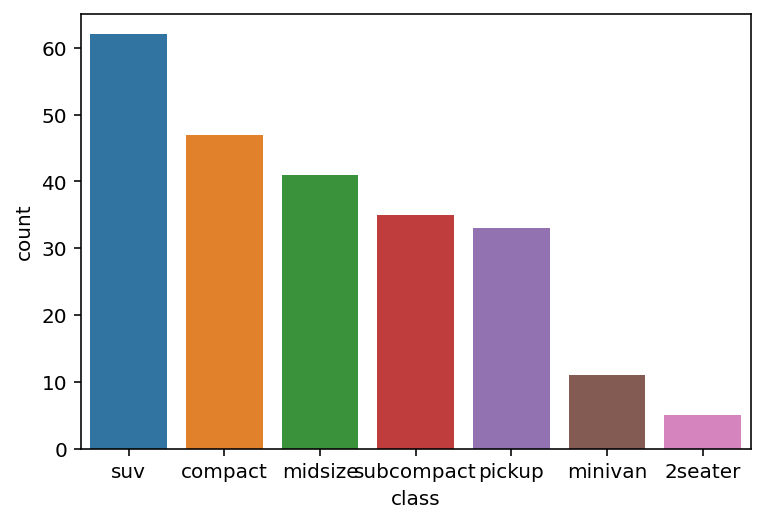

In [14]:
sns.countplot(x = 'class', data = df, order = df['class'].value_counts().index)

<AxesSubplot:xlabel='class', ylabel='count'>

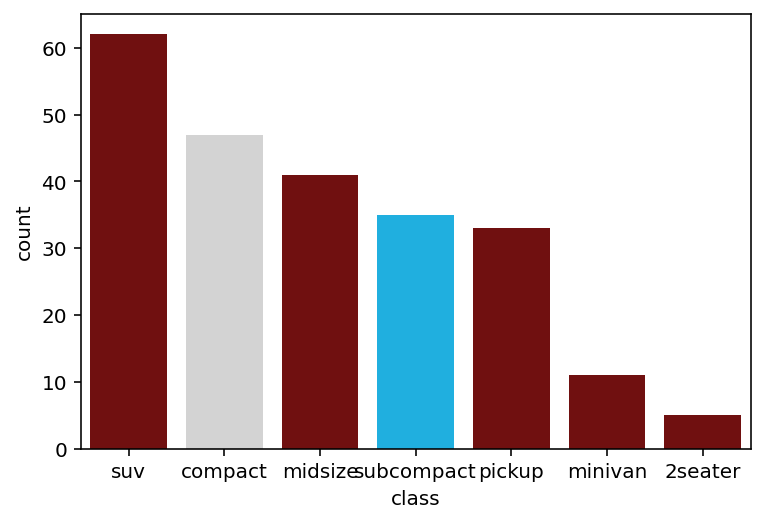

In [15]:
p = ['maroon','lightgray','maroon','deepskyblue','maroon','maroon','maroon']

sns.countplot(x='class', data=df,
              palette=p,
              order = df['class'].value_counts().index)

<AxesSubplot:xlabel='class', ylabel='count'>

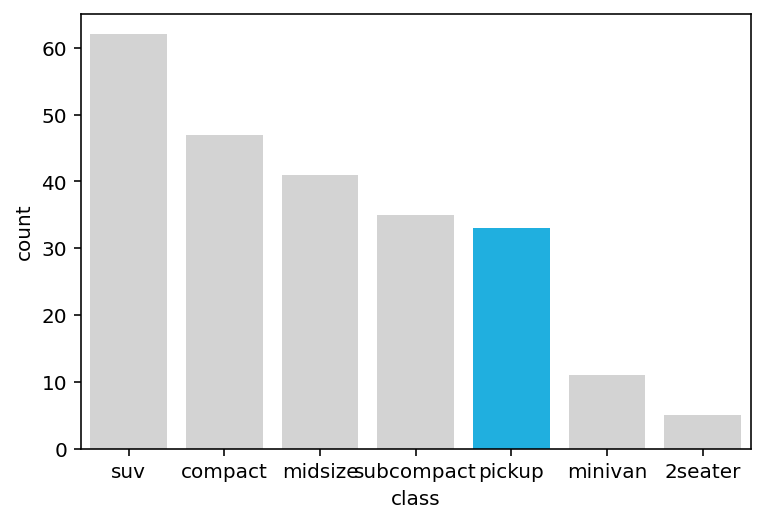

In [16]:
p = ["deepskyblue" if v == 'pickup' else "lightgray" for v in df['class'].value_counts().index]

sns.countplot(x='class', data=df,
              palette=p,
              order = df['class'].value_counts().index)

<AxesSubplot:xlabel='class', ylabel='count'>

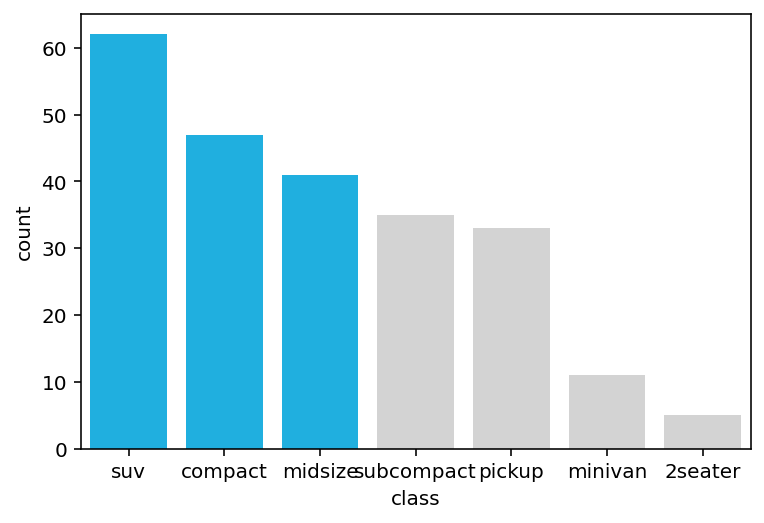

In [17]:
p = ["deepskyblue" if v > 40 else "lightgray" for v in df['class'].value_counts()]

sns.countplot(x='class', data=df,
              palette=p,
              order = df['class'].value_counts().index)

### Add horizontal line

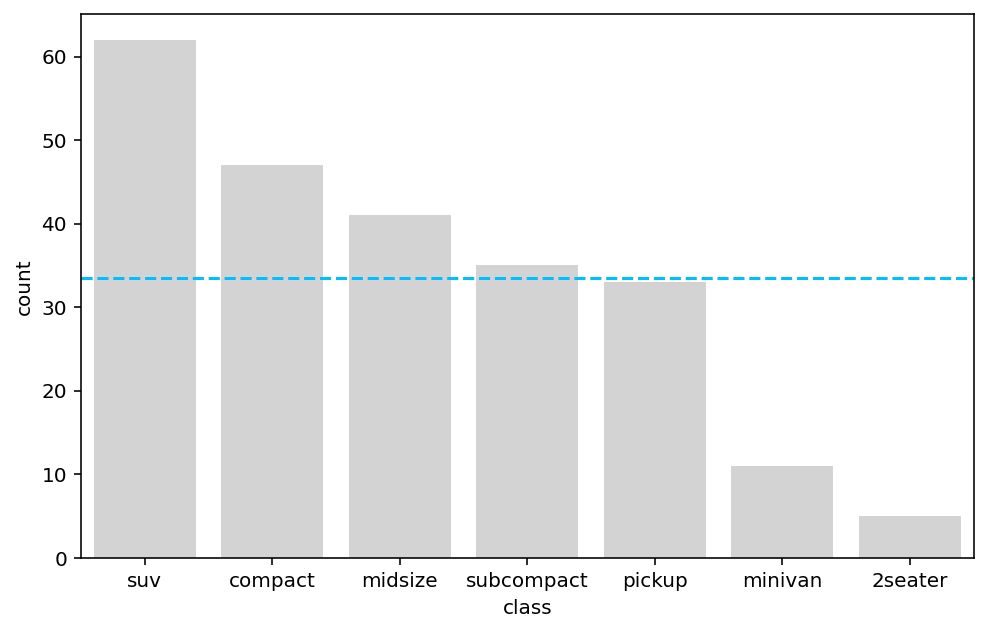

In [18]:
avg=df['class'].value_counts().mean()

plt.figure(figsize=(8,5))

sns.countplot(x = 'class',
              data = df,
              color = 'lightgray',
              order = df['class'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='deepskyblue')

### Add vertical line

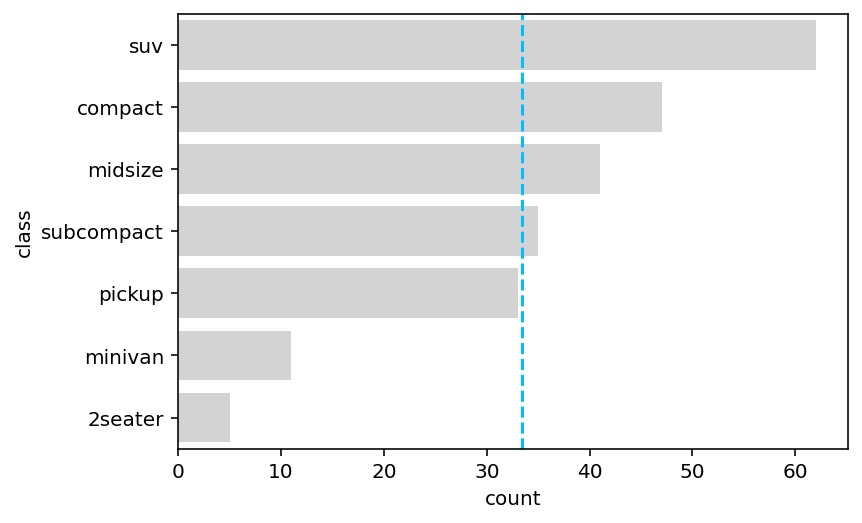

In [19]:
avg=df['class'].value_counts().mean()

sns.countplot(y = 'class',
              data = df,
              color = 'lightgray',
              order = df['class'].value_counts().index)
plt.axvline(x=avg, linestyle='--', color='deepskyblue')
plt.ylabel=''

In [20]:
avg=df['class'].value_counts().mean()
colors = ['tomato' if (x > avg) else 'lightgrey' for x in df['class'].value_counts()]
colors

['tomato', 'tomato', 'tomato', 'tomato', 'lightgrey', 'lightgrey', 'lightgrey']

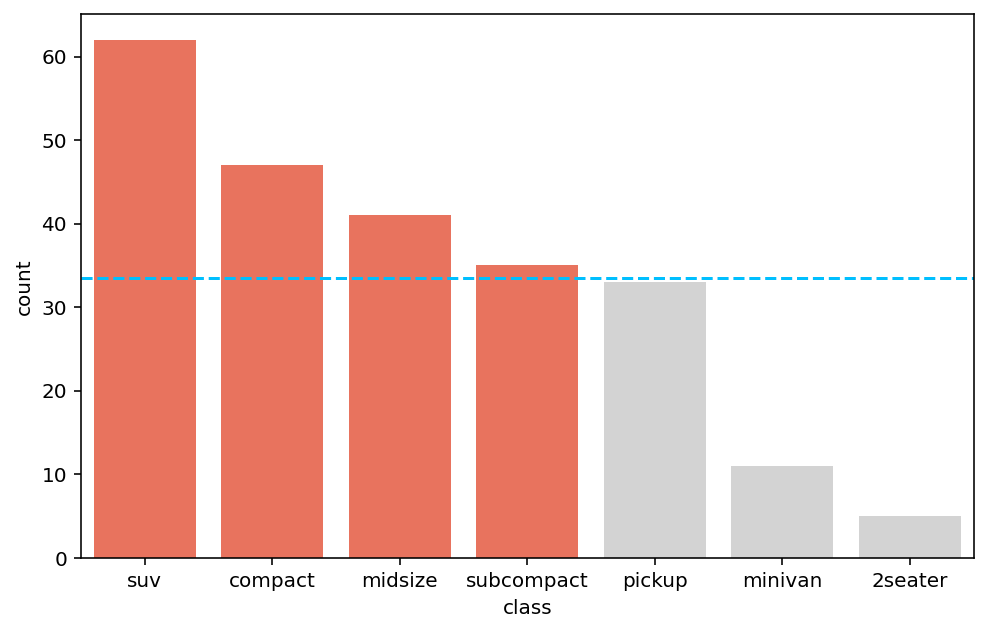

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'class',
              data = df,
              palette = colors,
              order = df['class'].value_counts().index)
plt.axhline(y=avg, linestyle='--', color='deepskyblue')

<AxesSubplot:xlabel='drv', ylabel='count'>

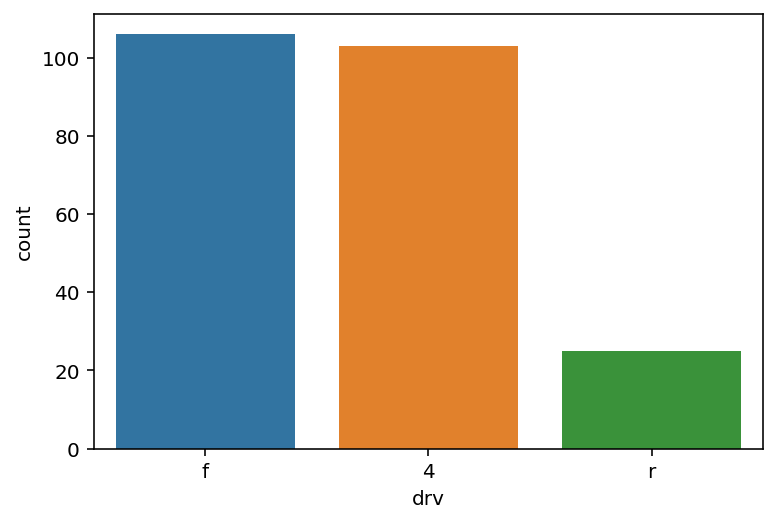

In [22]:
sns.countplot(x='drv', data=df)

### Categorize 'drv' column 

In [23]:
df['drv']=df.drv.map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact


<AxesSubplot:xlabel='drv', ylabel='count'>

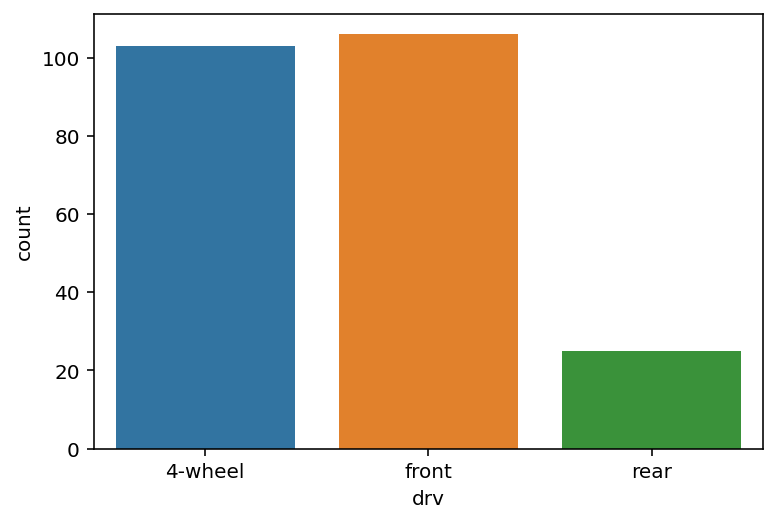

In [25]:
sns.countplot(x='drv', data=df)

<AxesSubplot:xlabel='drv', ylabel='count'>

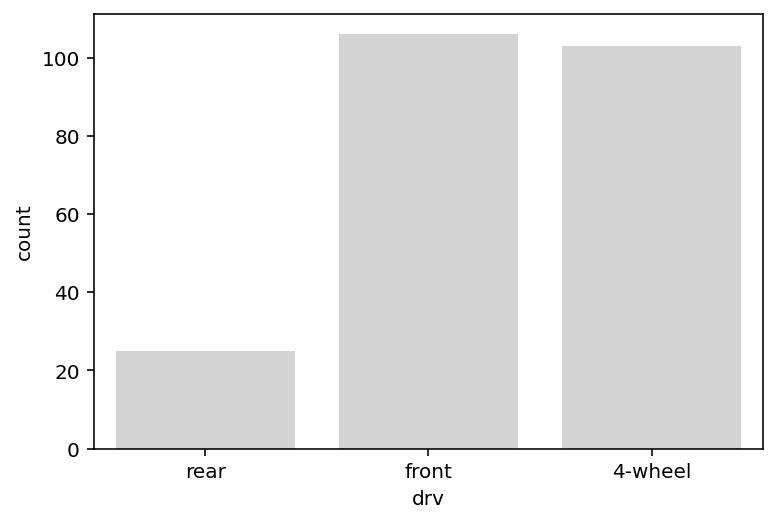

In [24]:
sns.countplot(x='drv', data=df, order=['rear', 'front', '4-wheel'], color='lightgray')

<AxesSubplot:xlabel='drv', ylabel='count'>

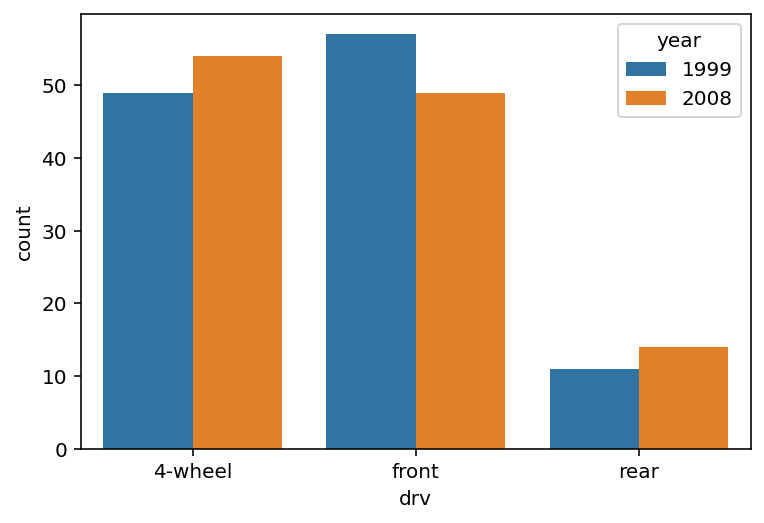

In [26]:
sns.countplot(x='drv', data=df, hue='year')

### Create 'gear' column from trans

In [28]:
df['gear'] = df.trans.str[0].map({'a': 'auto', 'm': 'manual'}).astype("category")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,gear
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact,auto
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact,manual
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact,manual
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact,auto
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact,auto


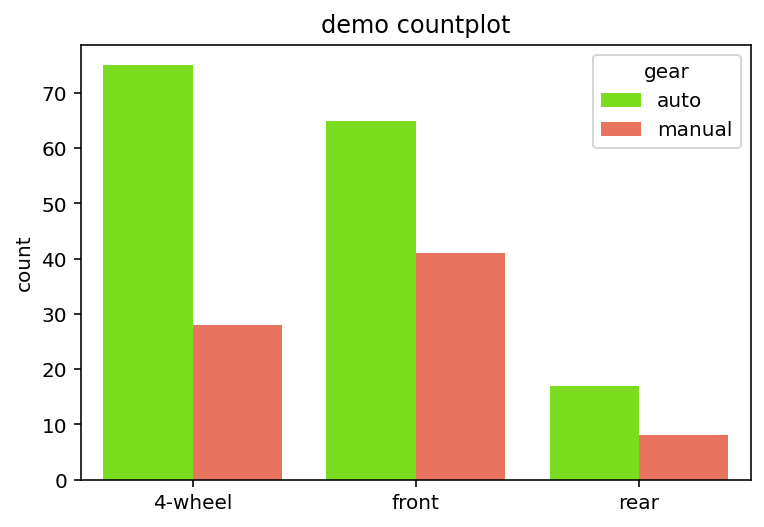

In [35]:
sns.countplot(x='drv', data=df, hue='gear', palette=['lawngreen', 'tomato']);
plt.xlabel('');
plt.title('demo countplot');

<AxesSubplot:xlabel='count', ylabel='gear'>

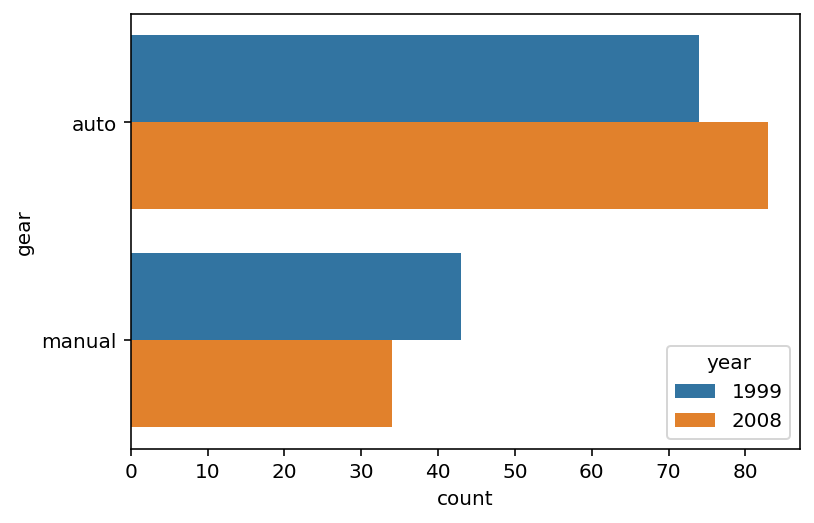

In [31]:
sns.countplot(y='gear', hue='year', data=df)